In [37]:
import pandas as pd
import numpy as np
from seaborn import plt
%matplotlib inline

In [3]:
df = pd.read_csv('loan.csv')

/Users/josephinetirtanata/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df.total_rec_late_fee==0].id.count()

874862

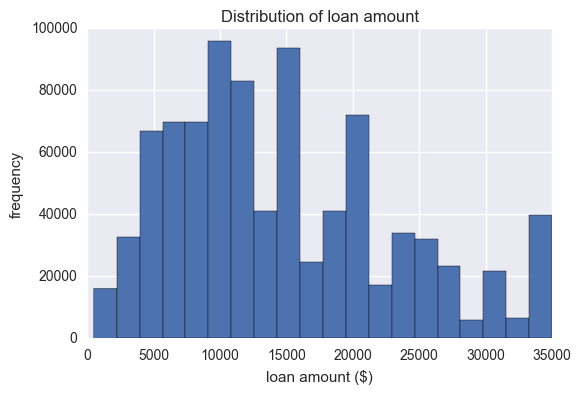

In [49]:
plt.hist(df.loan_amnt, bins=20)
plt.title('Distribution of loan amount')
plt.ylabel('frequency')
plt.xlabel('loan amount ($)');

- The distribution of the loan is between 0 to \$35,000, and it peaks at \$10,000.
- There seems to be a downward sloping pattern pass 10000, with little peaks on the "whole" numbers (15k, 20k, 25k, 30k)
- There seems to be another spike in 35k, perhaps, some users wanted to max out the possible amount 

In [17]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [18]:
df_default = df[df.loan_status == 'Default']
df_paid = df[df.loan_status == 'Fully Paid']
df_late = df[df.loan_status == 'Late (16-30 days)']
df_vlate = df[df.loan_status == 'Late (31-120 days)']
df_coff = df[df.loan_status == 'Charged Off']

In [38]:
df.loan_status.unique().shape

(10,)

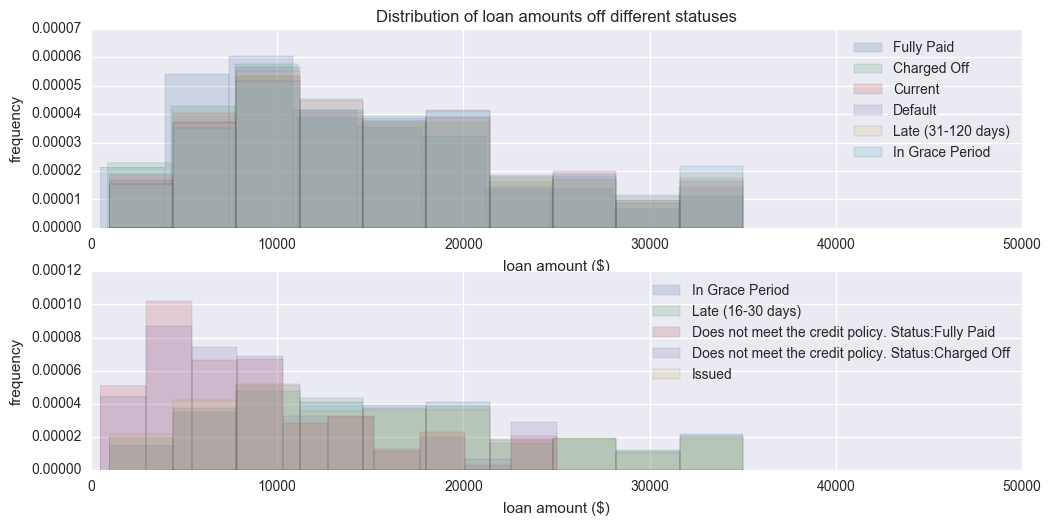

In [47]:
fig, axes = plt.subplots(2, figsize=(10, 5))
fig.tight_layout()
axes[0].set_title('Distribution of loan amounts off different statuses')
for i in range(2):

    for status in df.loan_status.unique()[i*5 : i*5 + 6]:
        cur_df = df[df.loan_status == status]
        axes[i].hist(cur_df.loan_amnt, label=status, alpha=0.2, normed=1)

    axes[i].legend(loc='best')
    axes[i].set_ylabel('frequency')
    axes[i].set_xlabel('loan amount ($)')
    axes[i].set_xlim(0, 50000);

- There is a higher percentage of fully paid with loan amounts of less than \$10,000
- It's difficult to read these histograms because there are 5 histograms in each axis
- Will categorize status to good and bad

In [52]:
good_loan_status = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_status = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
late_status = ['Late (16-30 days)', 'Late (31-120 days)']

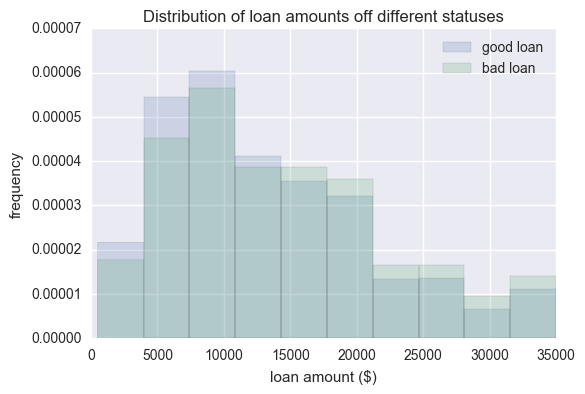

In [54]:
plt.title('Distribution of loan amounts off different statuses')
good_df = df[df.loan_status.isin(good_loan_status)]
bad_df = df[df.loan_status.isin(bad_loan_status)]

plt.hist(good_df.loan_amnt, label='good loan', alpha=0.2, normed=1)
plt.hist(bad_df.loan_amnt, label='bad loan', alpha=0.2, normed=1)

plt.legend(loc='best')
plt.ylabel('frequency')
plt.xlabel('loan amount ($)')

- There is a slight difference in the distribution between bad and good loan
- The bad loans have a higher percentage of higher loan amounts.

In [55]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [60]:
good_ho = good_df.groupby('home_ownership').size()
bad_ho = bad_df.groupby('home_ownership').size()

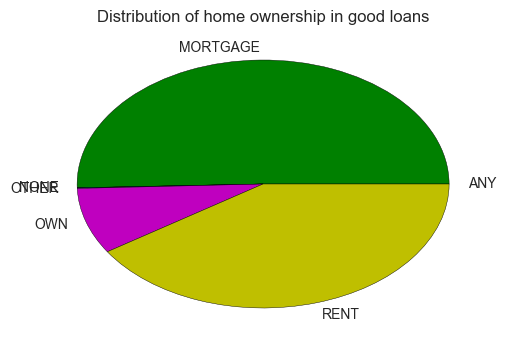

In [69]:
plt.title('Distribution of home ownership in good loans')
plt.pie(good_ho.values, labels=good_ho.index);

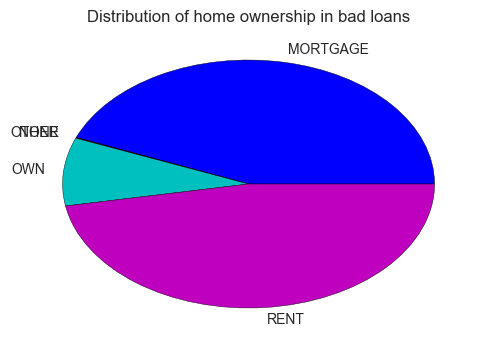

In [70]:
plt.title('Distribution of home ownership in bad loans')
plt.pie(bad_ho.values, labels=bad_ho.index);

- Interesting that the proportion of people who own homes are the same in both categories.
- What's to note here is that there's higher proportion of people renting in bad loans.
- Perhaps the people with the mortgage have better credit scores - which makes them more capable of paying off the loan?

In [74]:
df_revenue = df[['loan_status', 'total_rev_hi_lim', 'loan_amnt']].dropna()

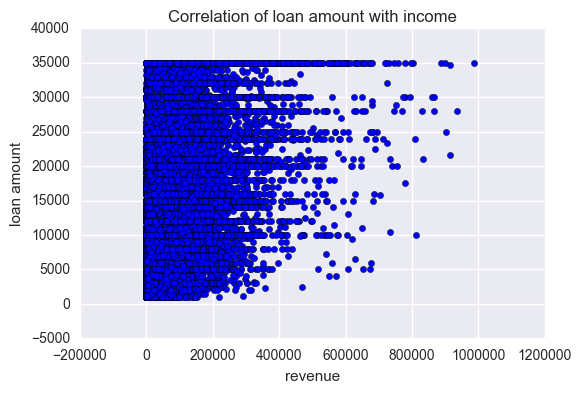

In [81]:
cur_df = df_revenue[df_revenue.total_rev_hi_lim < 1e6]
plt.scatter(cur_df.total_rev_hi_lim, cur_df.loan_amnt)
plt.title('Correlation of loan amount with income')
plt.ylabel('loan amount')
plt.xlabel('revenue')

In [111]:
good_df.shape[0]

209711

In [112]:
good_purpose = good_df.groupby('purpose').size() / good_df.shape[0]
bad_purpose = bad_df.groupby('purpose').size() / bad_df.shape[0]

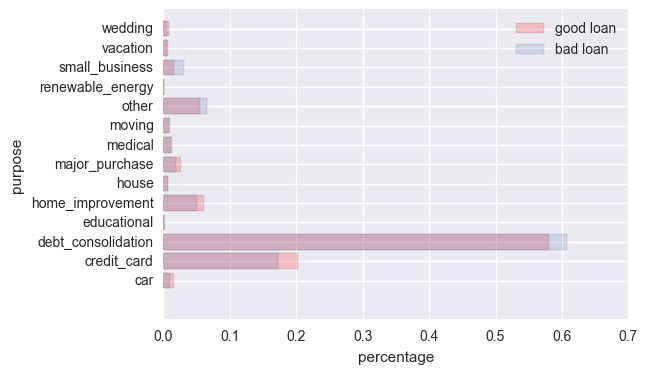

In [114]:
left = np.arange(good_purpose.shape[0])
plt.barh(left, good_purpose.values, alpha=0.2, label='good loan', align='center', color='red')
plt.barh(left, bad_purpose.values, alpha=0.2, label='bad loan', align='center')
plt.legend()
plt.xlabel('percentage')
plt.ylabel('purpose')
plt.yticks(left, good_purpose.index);

In [127]:
g_emp_len = good_df.groupby('emp_length').size() / good_df.shape[0]
b_emp_len = bad_df.groupby('emp_length').size() / bad_df.shape[0]

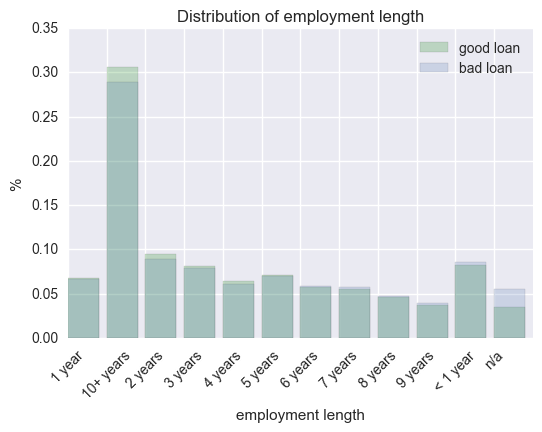

In [131]:
left = np.arange(g_emp_len.shape[0])
plt.bar(left, g_emp_len.values, alpha=0.2, label='good loan', color='green')
plt.bar(left, b_emp_len.values, alpha=0.2, label='bad loan')
plt.legend()
plt.xlabel('employment length')
plt.ylabel('%')
plt.xticks(left, g_emp_len.index, rotation=45)
plt.title('Distribution of employment length');

In [133]:
df.desc.values

array([ '  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ..., nan, nan, nan], dtype=object)